In [1]:
# Import SQLAlchemy and other dependencies here
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Float, Integer, String, Date
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

import pandas as pd
import numpy as np

In [2]:
# MatPlotLib/NumPy/SciPy
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
engine = create_engine('postgresql://postgres:9807775984@Bd@localhost:5432/marineMammals')
connection = engine.connect()

In [4]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [5]:
# Collect the names of tables within the database
inspector.get_table_names()

['marine_mammal']

In [6]:

# Using the inspector to print the column names within the 'marine_mammal' table and its types
columns = inspector.get_columns('marine_mammal')
for column in columns:
    print(column["name"], column["type"])

id VARCHAR(100)
species VARCHAR(65)
quantity NUMERIC
description VARCHAR(500)
url VARCHAR(200)
latitude NUMERIC
longitude NUMERIC
location VARCHAR
sighted_at DATE
created_at DATE
updated_at DATE
orca_type VARCHAR
orca_pod VARCHAR


In [7]:
#create marine_mammal class
class marine_mammal(Base):
    __tablename__ = 'marine_mammal'
    
    id = Column (String, primary_key=True)
    species = Column (String)
    quantity = Column (Integer)
    description = Column (String)
    url = Column (String)
    latitude = Column (Float)
    longitude = Column (Float)
    location = Column (String)
    sighted_at = Column (Date)
    created_at = Column (Date)
    updated_at = Column (Date)
    orca_type = Column (String)
    orca_pod = Column (String)

In [8]:
session = Session(engine)

In [9]:
marine_mammal_data = pd.read_sql("select * from marine_mammal", connection)

In [14]:
marine_mammal_data.head()

,id,species,quantity,description,url,latitude,longitude,location,sighted_at,created_at,updated_at,orca_type,orca_pod
0,5a049b7e686f743ec5040000,orca,5.0,"Spotted from the Edmonds-Kingston ferry, near ...",http://hotline.whalemuseum.org/sightings/5a049...,47.799530,-122.479967,None,2017-11-09,2017-11-09,2017-11-14,unknown,None
1,59d039a0686f743ec5020000,harbor porpoise,20.0,From the Inn at Langley looking east there was...,http://hotline.whalemuseum.org/sightings/59d03...,48.047448,-122.404776,"Camano Island, WA, US",2017-10-01,2017-10-01,2017-10-03,unknown,None
2,59ab6d65686f747484140000,humpback,1.0,"heading north in the Tacoma narrows,, between ...",http://hotline.whalemuseum.org/sightings/59ab6...,47.307289,-122.561674,"Gig Harbor, WA, US",2017-09-03,2017-09-03,2017-09-06,unknown,None
3,597d058d686f7474840b0000,humpback,1.0,A large splash (breech?) first observed off Ke...,http://hotline.whalemuseum.org/sightings/597d0...,47.166960,-122.614546,"Steilacoom, WA, US",2017-07-29,2017-07-29,2017-08-03,unknown,None
4,596b516e686f747484090000,humpback,1.0,On train near picnic point (south of Mukilteo)...,http://hotline.whalemuseum.org/sightings/596b5...,47.884579,-122.342120,"Edmonds, WA, US",2017-07-16,2017-07-16,2017-08-03,unknown,None


In [88]:
df1 = pd.DataFrame (marine_mammal_data, columns = ['location','species'])
df1

,location,species
0,None,orca
1,"Camano Island, WA, US",harbor porpoise
2,"Gig Harbor, WA, US",humpback
3,"Steilacoom, WA, US",humpback
4,"Edmonds, WA, US",humpback
...,...,...
995,"Friday Harbor, WA, US",orca
996,"Friday Harbor, WA, US",orca
997,"Friday Harbor, WA, US",orca
998,"Friday Harbor, WA, US",orca


In [89]:
df2=df1.groupby('location').count()
df2

,species
location,
"Allyn-Grapeview, WA, US",1
"Anacortes, WA, US",1
"Bainbridge Island, WA, US",6
"Blakely Island, WA, US",1
"Burien, WA, US",1
"Camano Island, WA, US",1
"Capital, BC, CA",1
"Coupeville, WA, US",1
"Delta, BC, CA",12


In [99]:
location = df2.index.tolist()
quantity=df2['species'].tolist() 
print(location)
print(quantity)

['Allyn-Grapeview, WA, US', 'Anacortes, WA, US', 'Bainbridge Island, WA, US', 'Blakely Island, WA, US', 'Burien, WA, US', 'Camano Island, WA, US', 'Capital, BC, CA', 'Coupeville, WA, US', 'Delta, BC, CA', 'Duncan, BC, CA', 'Eastsound, WA, US', 'Edmonds, WA, US', 'Friday Harbor, WA, US', 'Gabriola, BC, CA', 'Galiano Island, BC, CA', 'Garden Bay, BC, CA', 'Gig Harbor, WA, US', 'Juan de Fuca, BC, CA', 'Kingston, WA, US', 'Lopez Island, WA, US', 'Mayne Island, BC, CA', 'Mount Waddington A, BC, CA', 'Nanaimo, BC, CA', 'North Saanich, BC, CA', 'Olga, WA, US', 'Pender Island, BC, CA', 'Point Roberts, WA, US', 'Port Angeles, WA, US', 'Port Renfrew, BC, CA', 'Richmond, BC, CA', 'Saturna, BC, CA', 'Seattle, WA, US', 'Sequim, WA, US', 'Shirley, BC, CA', 'Sidney, BC, CA', 'Sooke, BC, CA', 'Southern Gulf Islands, BC, CA', 'Steilacoom, WA, US', 'Vancouver, BC, CA', 'Vashon, WA, US', 'Victoria, BC, CA', 'West Vancouver, BC, CA']
[1, 1, 6, 1, 1, 1, 1, 1, 12, 1, 4, 1, 596, 3, 6, 1, 1, 30, 3, 1, 17, 3, 

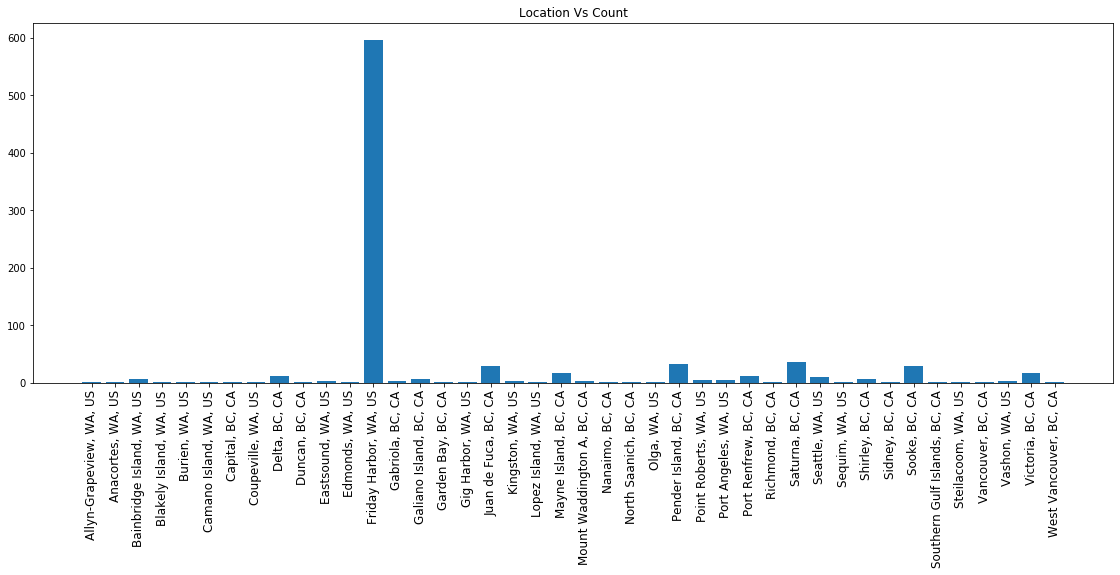

<Figure size 432x288 with 0 Axes>

In [122]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
x = location
y = quantity 
ax.bar(x,y)
plt.xticks(rotation=90,fontsize=12)
plt.title('Location Vs Count')

plt.show()
plt.savefig('Location Vs Count.png')

In [101]:
df3=df1.groupby('species').count()
species=df3.index.tolist()
Quantity=df3['location'].tolist() 
df3

,location
species,
gray whale,1
harbor porpoise,1
humpback,3
orca,858


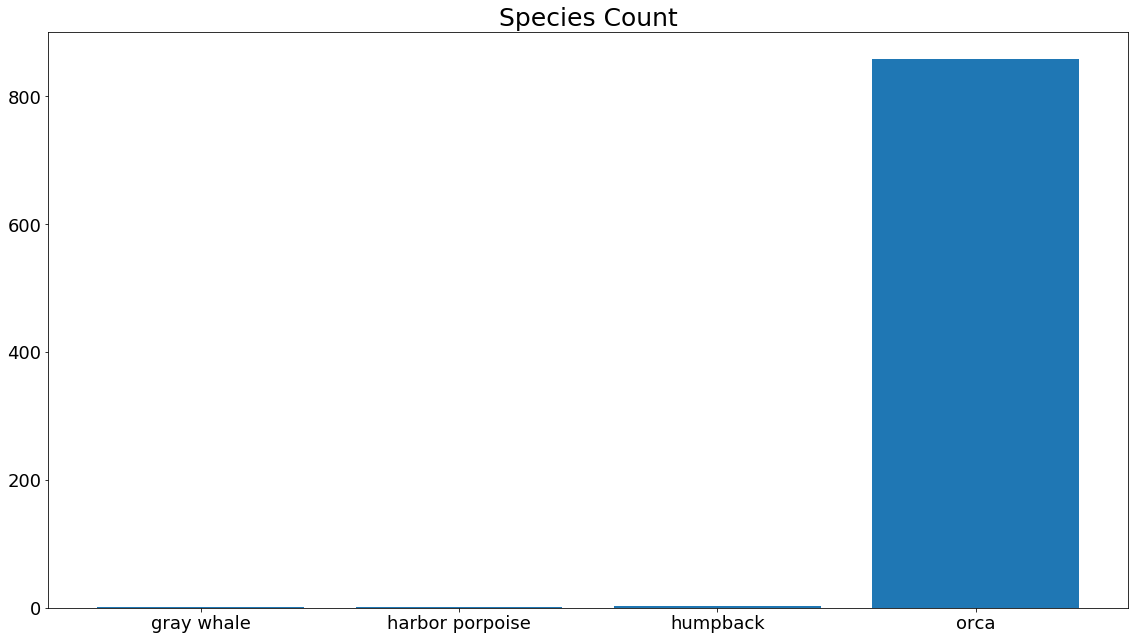

<Figure size 432x288 with 0 Axes>

In [132]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0,0,1,1])
x = species
y = Quantity
ax.bar(x,y)
plt.title('Species Count',size=25)
plt.xticks(rotation=0,fontsize=18)
plt.yticks(rotation=0,fontsize=18)
plt.show()
plt.savefig('species Count.png')

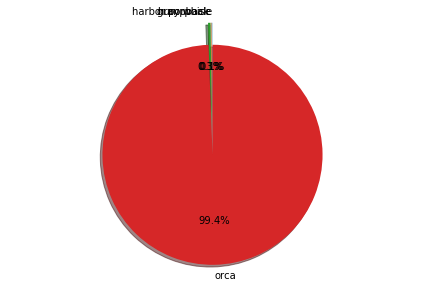

In [94]:
# Pie chart
labels = 'gray whale','harbor porpoise','humpback','orca'
sizes =  df3['location'].tolist()
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1, 0.1, 0.1, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

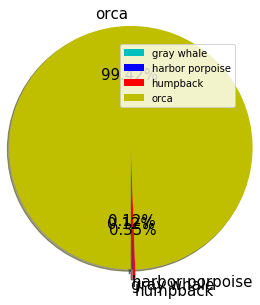

In [103]:
explode = [0.03,0,0.1,0] # To slice the perticuler section
colors = ["c", 'b','r','y'] # Color of each section
textprops = {"fontsize":15} # Font size of text in pie chart
 
plt.pie(Quantity, # Values
        labels = species, # Labels for each sections
        explode = explode, # To slice the perticuler section
        colors =colors, # Color of each section
        autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.4, # Radius to increase or decrease the size of pie chart 
       startangle = 270, # Start angle of first section
        textprops =textprops) 
plt.legend() # To show legend
plt.show() # To show pie chart only